# Online Meta Learning : 1-D 


## We analyse the MAML algorithm for the batch mode in order to assess its convergence

In [20]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial import ConvexHull
from quadprog import solve_qp


def random_walk():
    a = np.random.randint(0,2, size = (25))
    a = np.cumsum(2*a-1)
    return(a)



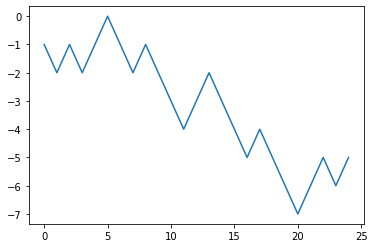

In [21]:
mean_a = random_walk()
plt.plot(-mean_a)

Mini Max Optimisation

In [22]:
def projection_simplex_sort(v, z=1):
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w


In [26]:
step_size = 0.5
theta_btl = 0
btl_loss = []
btl_param = []
X = []
p = np.ones(len(mean_a))/len(mean_a)
high = []
zero = []
sixteen = []

for (i,mean) in enumerate(mean_a):
    x_curr = np.random.randn(1000)
    x_curr = x_curr + mean
    X.append(x_curr)    

for j in range(1000):

#         loss_grad_ftl = 0
    loss_grad = 0
    for k,x_tune in enumerate(X):

        ind_tune_1 = x_tune > mean_a[k]
        ind_tune_0 = x_tune < mean_a[k]

        # b) Gradient of loss of task m at theta
        loss_fine_grad = (-np.sum((1-1/(1+np.exp(-(x_tune[ind_tune_1]+theta_btl)))))+np.sum(1/(1+np.exp(-(x_tune[ind_tune_0]+theta_btl)))))
        loss_fine_grad/=len(x_tune)
        
        loss_grad += loss_fine_grad*p[k]

        loss_fine = (np.sum(np.log(1+np.exp(-(x_tune[ind_tune_1]+theta_btl))))-np.sum(np.log(np.exp(-(x_tune[ind_tune_0]+theta_btl))/(1+np.exp(-(x_tune[ind_tune_0]+theta_btl))))))/len(x_tune)
        p[k] += 0.01*loss_fine
        
    btl_loss.append(loss_grad)
    theta_btl = theta_btl - step_size*(loss_grad)
    btl_param.append(theta_btl)
    p = projection_simplex_sort(p)
    high.append(np.max(1))
    zero.append(p[5])
    sixteen.append(p[20])

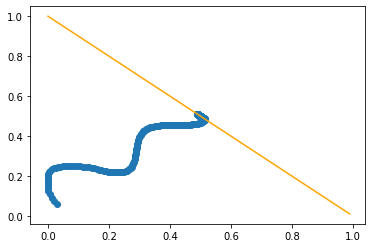

In [28]:
plt.scatter(zero,sixteen)
t = np.arange(0,1,0.01)
plt.plot(t,1-t,color = 'orange')

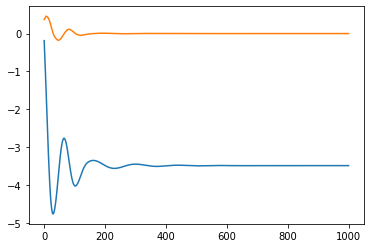

In [30]:
plt.plot(btl_param)
plt.plot(btl_loss)